In [21]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-v0_8-dark')
plt.rc('figure', figsize=(12,4))

# Convolution using the Gaussian Kernel

In [22]:
sample_rate = 512 # Hz
t = np.arange(0,4,1/sample_rate)

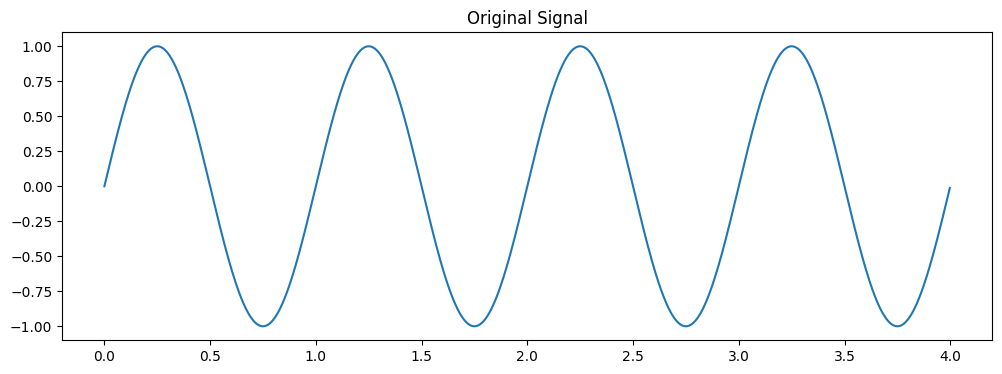

In [23]:
x = np.sin(2*np.pi*t)
plt.plot(t, x)
plt.title("Original Signal")
plt.show()

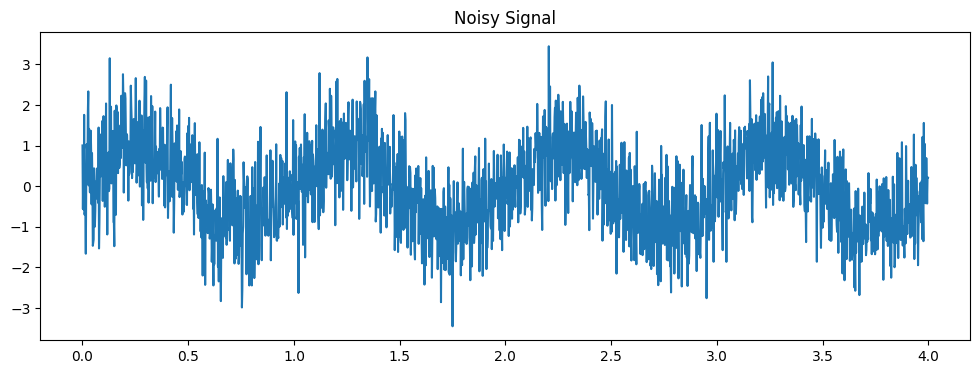

In [24]:
noise = np.random.normal(loc=0, scale=.8, size=len(t))
noisy_signal = x + noise
plt.title("Noisy Signal")
plt.plot(t,noisy_signal)
plt.show()

## Define Gaussian Kernel

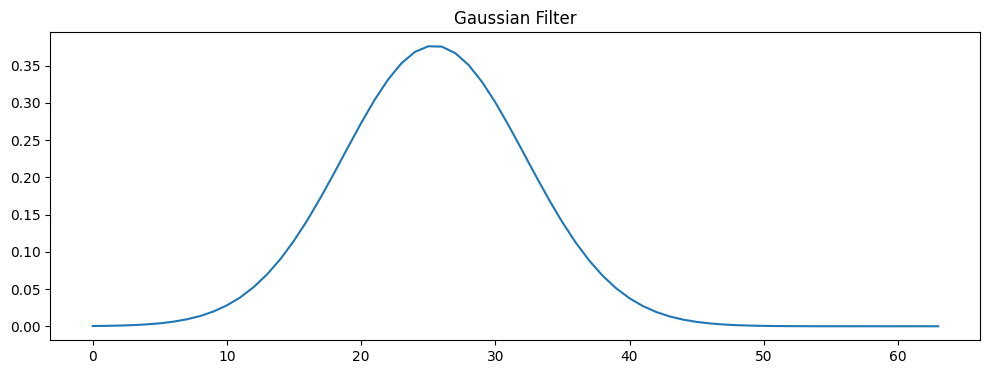

In [25]:
idx_range = 10
mu = noisy_signal.mean()
sigma = noisy_signal.std()
kernel_size = 64
idx = np.arange(-idx_range//2 + 1, idx_range//2+1, step=idx_range/kernel_size)
gauss_filter = np.exp(-(idx-mu)**2 / (2 * sigma**2)) / (np.sqrt(2*np.pi) * sigma)
plt.plot(gauss_filter)
plt.title("Gaussian Filter")
plt.show()

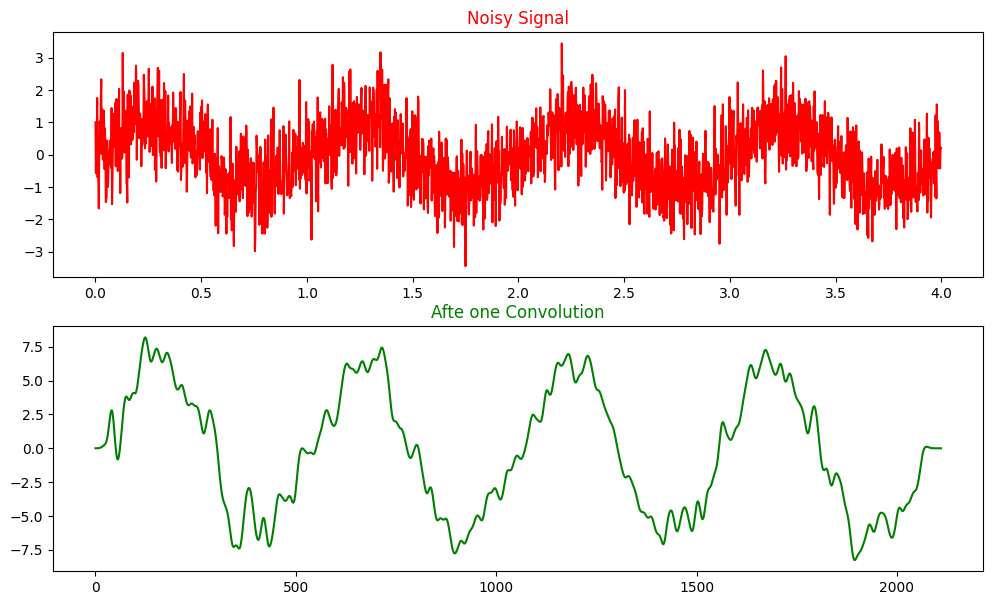

In [26]:
mode = 'full'
filtered_Signal = np.convolve(noisy_signal, gauss_filter, mode=mode)
plt.figure(figsize=(12,7))
plt.subplot(211)
plt.title("Noisy Signal", color='r')
plt.plot(t, noisy_signal, color='r')
plt.subplot(212)
plt.plot(filtered_Signal, color='g')
plt.title("Afte one Convolution", color='g')
plt.show()

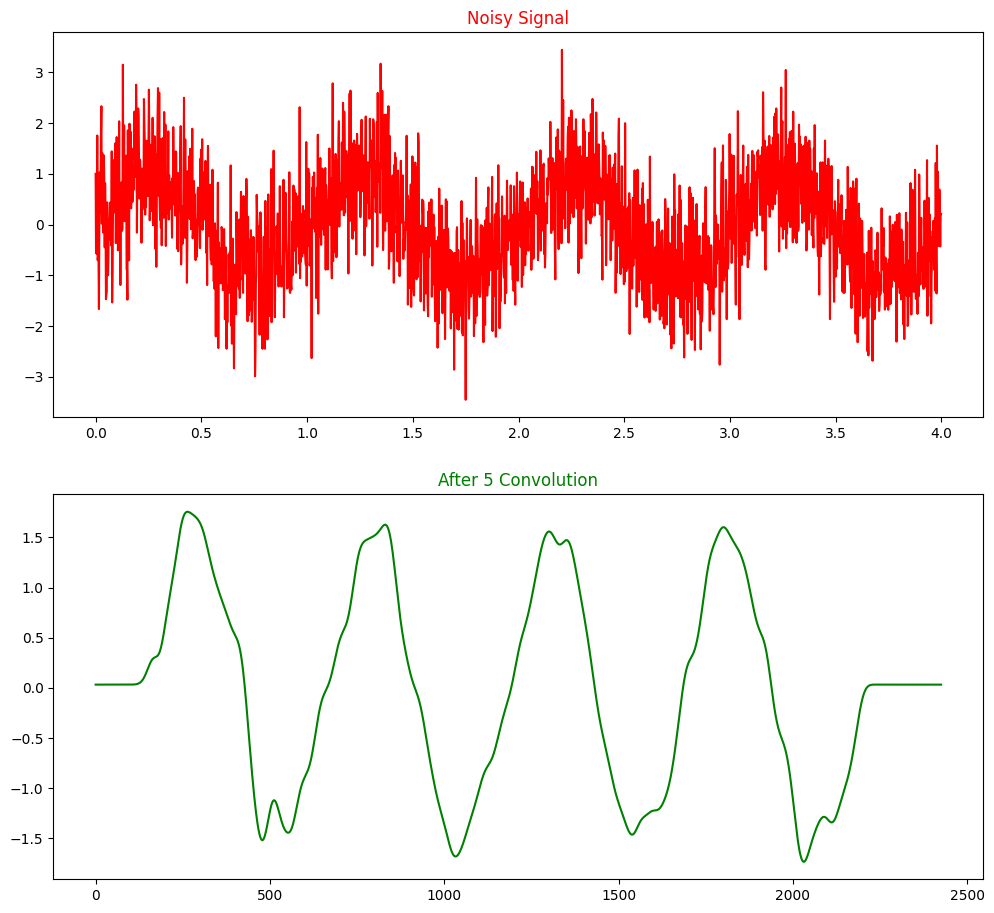

In [27]:
n = 5
for _ in range(n):
    filtered_Signal = np.convolve(filtered_Signal, gauss_filter, mode=mode) # type: ignore
    filtered_Signal = np.trim_zeros(filtered_Signal, trim='fb')
filtered_Signal = (filtered_Signal - filtered_Signal.mean()) / filtered_Signal.std() # normalize the signal to keep amplitude close to original
plt.figure(figsize=(12,11))
plt.subplot(211)
plt.title("Noisy Signal", color='r')
plt.plot(t, noisy_signal, color='r')
plt.subplot(212)
plt.plot(filtered_Signal, color='g')
plt.title(f"After {n} Convolution", color='g')
plt.show()

# Correlation

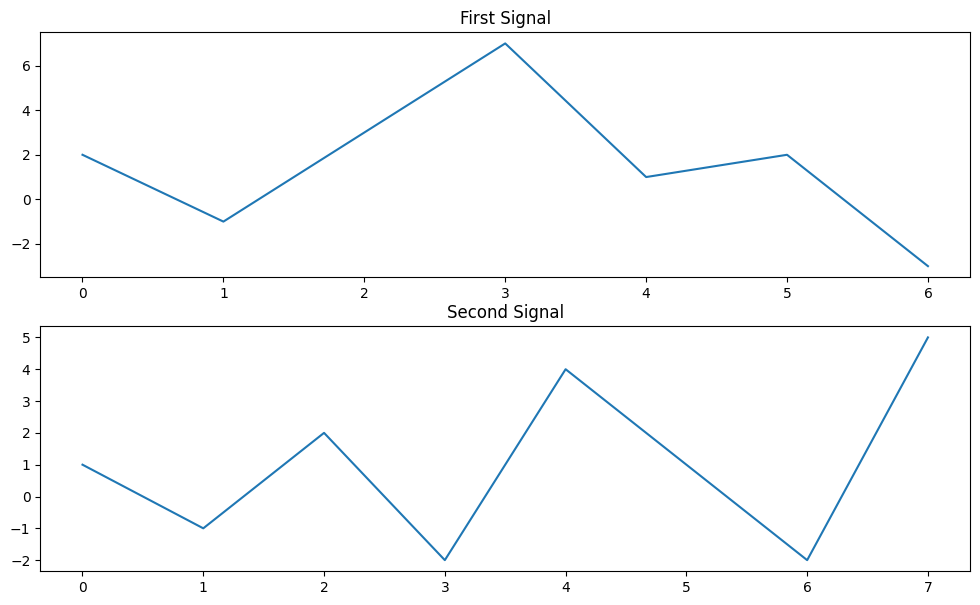

In [28]:
signal1 = [2,-1,3,7,1,2,-3]
signal2 = [1,-1,2,-2,4,1,-2,5]
plt.figure(figsize=(12,7))
plt.subplot(211)
plt.plot(signal1)
plt.title("First Signal")
plt.subplot(212)
plt.plot(signal2)
plt.title("Second Signal")
plt.show()

In [29]:
corr = np.correlate(signal1, signal2, mode='full')
corr

array([ 10,  -9,  19,  36, -14,  33,   0,   7,  13, -18,  16,  -7,   5,
        -3])